<h1 style="text-align: center;">AIRLINE PASSENGER SATISFACTION</h1>

# 1. INTRODUCTION

Air travel is an essential mode of transportation, connecting people across regions efficiently. Passenger satisfaction plays a vital role in the success of airlines. This project analyzes flight and passenger data to uncover key travel patterns, delays, and satisfaction levels. By understanding these factors, airlines can improve their services, optimize operations, and enhance the overall passenger experience.

## OBJECTIVE

- Understand passenger trends, flight distances, and delays.
- Analyze satisfaction levels based on travel type, flight class, and passenger category.
- Identify key factors affecting satisfaction, such as punctuality, comfort, food, and Wi-Fi.

# 2. DATA PREPROCESSING

## IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATASET

In [8]:
df=pd.read_csv('airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## STRUCTURE OF THE DATASET

In [11]:
df.shape

(129880, 24)

The dataset has 129880 rows and 24 columns.

## BASIC INFORMATION

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

## DISPLAY ALL COLUMNS

In [18]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [20]:
#Renaming column names

df.rename(columns={'Customer Type':'Passenger Type'},inplace=True)
df.rename(columns={'Type of Travel':'Travel Purpose'},inplace=True)
df.rename(columns={'Departure Delay':'Departure Delay(Mins)'},inplace=True)
df.rename(columns={'Arrival Delay':'Arrival Delay(Mins)'},inplace=True)

In [ ]:
#Changing passenger type to new and regular

df['Passenger Type'].replace('First-time','New',inplace=True)
df['Passenger Type'].replace('Returning','Regular',inplace=True)

In [24]:
#Removing id column

df.drop('ID',axis=1,inplace=True)

In [28]:
df

,Gender,Age,Passenger Type,Travel Purpose,Class,Flight Distance,Departure Delay(Mins),Arrival Delay(Mins),Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,New,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Regular,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Regular,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Regular,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Regular,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Regular,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Regular,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Regular,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Regular,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


## DUPLICATE VALUES

In [31]:
df.duplicated().sum()

0

There is no duplicate values in this dataset.

## NULL VALUES

In [35]:
#Finding null values

df.isna().sum()

Gender                                      0
Age                                         0
Passenger Type                              0
Travel Purpose                              0
Class                                       0
Flight Distance                             0
Departure Delay(Mins)                       0
Arrival Delay(Mins)                       393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

<Axes: ylabel='Arrival Delay(Mins)'>

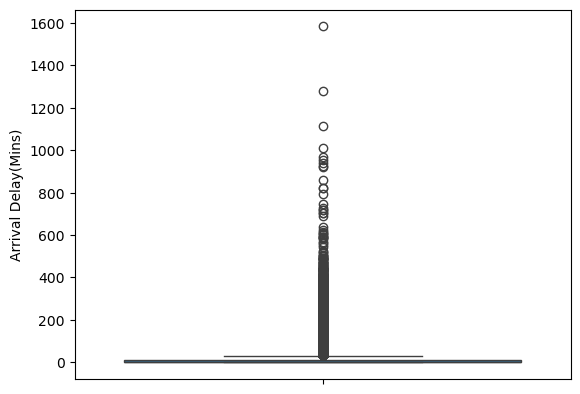

In [37]:
sns.boxplot(y='Arrival Delay(Mins)',data=df)

In [39]:
df['Arrival Delay(Mins)'].value_counts()

Arrival Delay(Mins)
0.0       72753
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
1011.0        1
386.0         1
624.0         1
355.0         1
412.0         1
Name: count, Length: 472, dtype: int64

In [41]:
df['Arrival Delay(Mins)'].mode()[0]

0.0

The Mode of Arrival Delay(Mins)is 0,Therefore filling the null values with 0.

In [ ]:
#Treating the null values

df['Arrival Delay(Mins)'].fillna(0,inplace=True)

In [46]:
#Checking the null values

df.isna().sum()

Gender                                    0
Age                                       0
Passenger Type                            0
Travel Purpose                            0
Class                                     0
Flight Distance                           0
Departure Delay(Mins)                     0
Arrival Delay(Mins)                       0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

## STATISTICAL SUMMARY

In [49]:
df.describe()

,Age,Flight Distance,Departure Delay(Mins),Arrival Delay(Mins),Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## OUTLIER

In [52]:
def replace_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    return data.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

Outliers are replaced by setting values above the upper bound to the upper bound and values below the lower bound to the lower bound, ensuring all data remains within a defined range.

### Departure Delay Column

In [54]:
df['Departure Delay(Mins)']=replace_outliers(df['Departure Delay(Mins)'])

In [56]:
df['Departure Delay(Mins)'].describe()

count    129880.000000
mean          7.380798
std          11.209935
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max          30.000000
Name: Departure Delay(Mins), dtype: float64

<Axes: ylabel='Departure Delay(Mins)'>

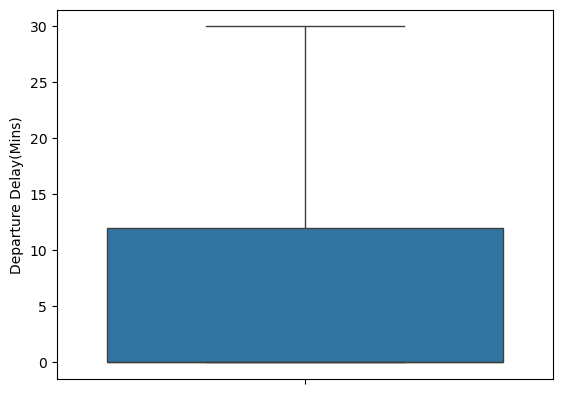

In [58]:
sns.boxplot(y='Departure Delay(Mins)',data=df)

### Arrival Delay Column

In [63]:
df['Arrival Delay(Mins)']=replace_outliers(df['Arrival Delay(Mins)'])

In [65]:
df['Arrival Delay(Mins)'].describe()

count    129880.000000
mean          7.909386
std          11.971151
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max          32.500000
Name: Arrival Delay(Mins), dtype: float64

<Axes: ylabel='Arrival Delay(Mins)'>

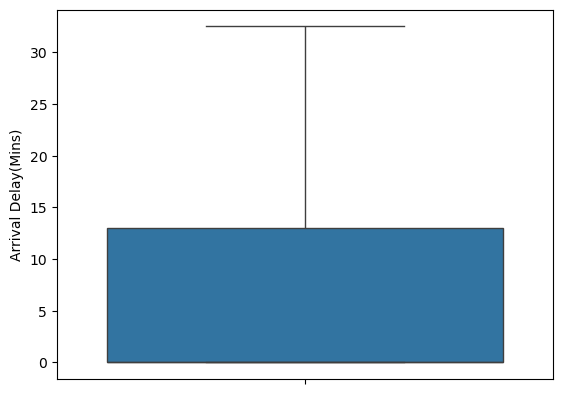

In [67]:
sns.boxplot(y='Arrival Delay(Mins)',data=df)

# 3. VISUALIZATION AND ANALYSIS

## UNI-VARIATE ANALYSIS

## DISTRIBUTION OF AGE,FLIGHT DISTANCE AND DELAYS

Text(0, 0.5, 'count')

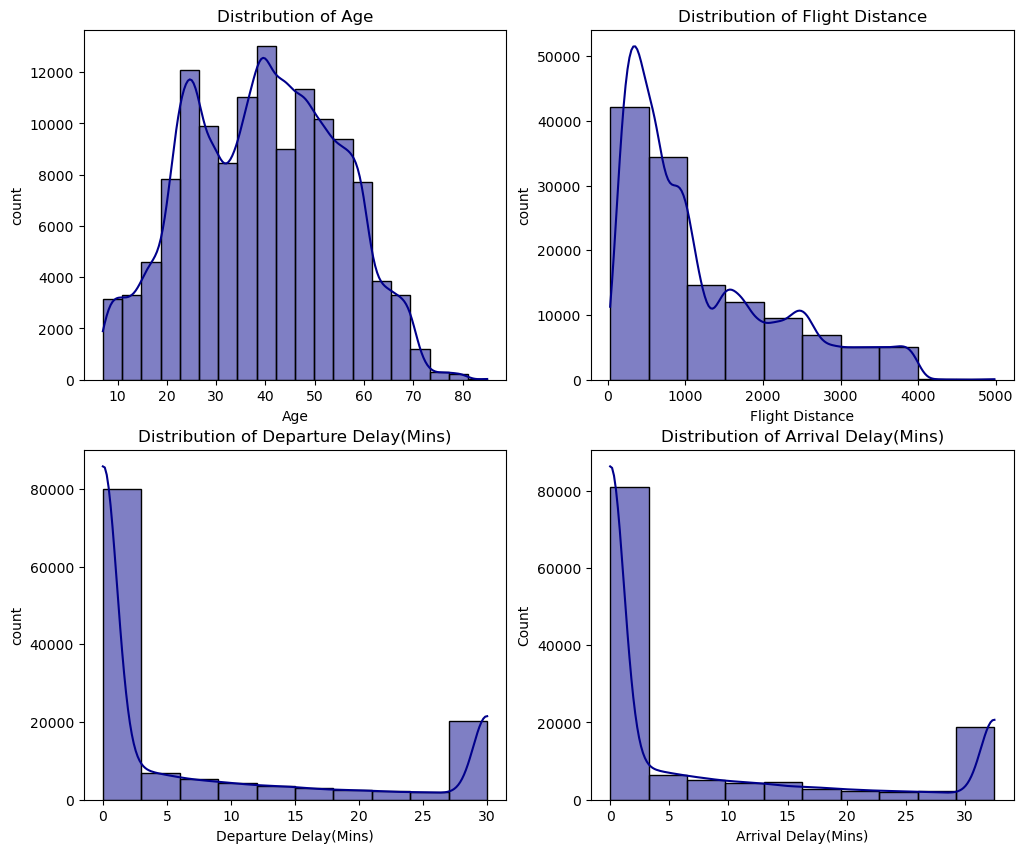

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Age'], bins=20, kde=True, color='darkblue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Age")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("count")

sns.histplot(df['Flight Distance'], bins=10, kde=True, color='darkblue', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Flight Distance")
axes[0, 1].set_xlabel("Flight Distance")
axes[0, 1].set_ylabel("count")

sns.histplot(df['Departure Delay(Mins)'], bins=10, kde=True, color='darkblue', ax=axes[1,0])
axes[1,0].set_title("Distribution of Departure Delay(Mins)")
axes[1,0].set_xlabel("Departure Delay(Mins)")
axes[1,0].set_ylabel("count")

sns.histplot(df['Arrival Delay(Mins)'], bins=10, kde=True, color='darkblue', ax=axes[1,1])
axes[1,1].set_title("Distribution of Arrival Delay(Mins)")
axes[1,1].set_xlabel("Arrival Delay(Mins)")
axes[1,0].set_ylabel("count")

## Insights from Uni-variate Analysis

- **Age:** Most passengers are between 20-60 years old.
- **Flight Distance:** Most flights cover a distance of less than 1000 km, making short-haul flights the most common. Longer flights are much less frequent in the data.
- **Delays:** Most flights take off and arrive with a delay of only 0-2 minutes, meaning they are mostly on time. However, a small number of flights experience much longer delays, especially around 30 minutes.

## BI-VARIATE ANALYSIS

## SATISFACTION DISTRIBUTION

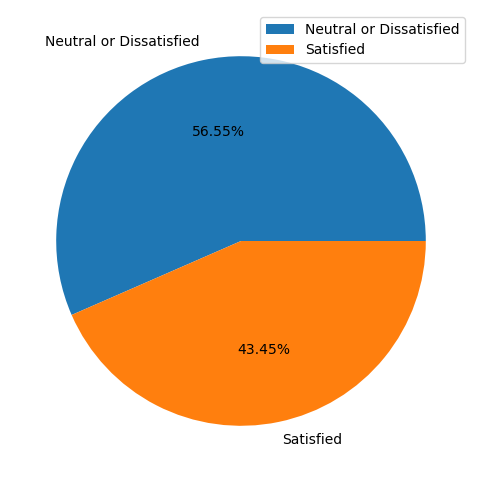

In [84]:
plt.figure(figsize=(10,6),dpi=100)
plt.pie(df.Satisfaction.value_counts(),labels=df.Satisfaction.value_counts().index,autopct='%.2f%%')
plt.legend()
plt.show()

## SATISFACTION BY TRAVEL PURPOSE

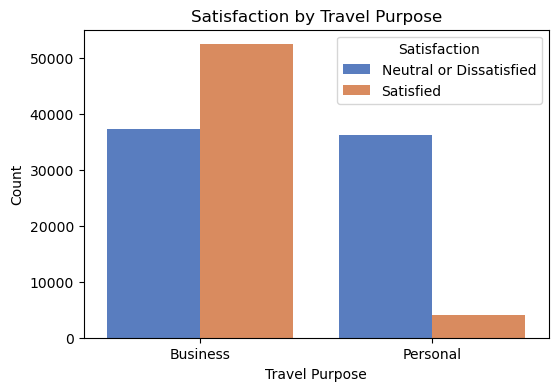

In [87]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Travel Purpose", hue="Satisfaction", palette="muted")
plt.title("Satisfaction by Travel Purpose")
plt.xlabel("Travel Purpose")
plt.ylabel("Count")
plt.show()

## SATISFACTION BY FLIGHT CLASS

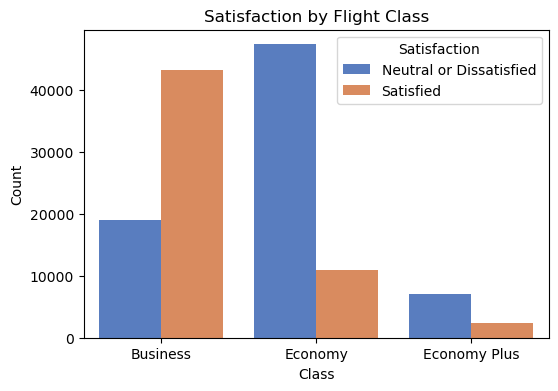

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Class", hue="Satisfaction", palette="muted")
plt.title("Satisfaction by Flight Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## SATISFACTION BY PASSENGER TYPE

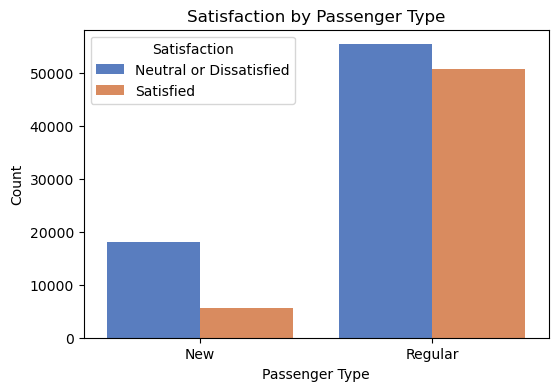

In [93]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Passenger Type", hue="Satisfaction", palette="muted")
plt.title("Satisfaction by Passenger Type")
plt.xlabel("Passenger Type")
plt.ylabel("Count")
plt.show()

## Insights from Bi-variate Analysis

- **Satisfaction Levels:** More passengers are Neutral or Dissatisfied than Satisfied.
- **Satisfaction by Travel Purpose:** Business travelers are mostly satisfied with their experience, while personal travelers are mostly neutral or dissatisfied, with very few reporting satisfaction.
- **Satisfaction by Flight Class:** Business class passengers are mostly satisfied, while economy class passengers are mostly neutral or dissatisfied. Economy Plus has the lowest number of passengers, with very few reporting satisfaction.
- **Satisfaction by Passenger Type:** Regular passengers have a more balanced satisfaction level, while new passengers are mostly neutral or dissatisfied, with very few reporting satisfaction.

## MULTI-VARIATE ANALYSIS

## CORRELATION HEATMAP

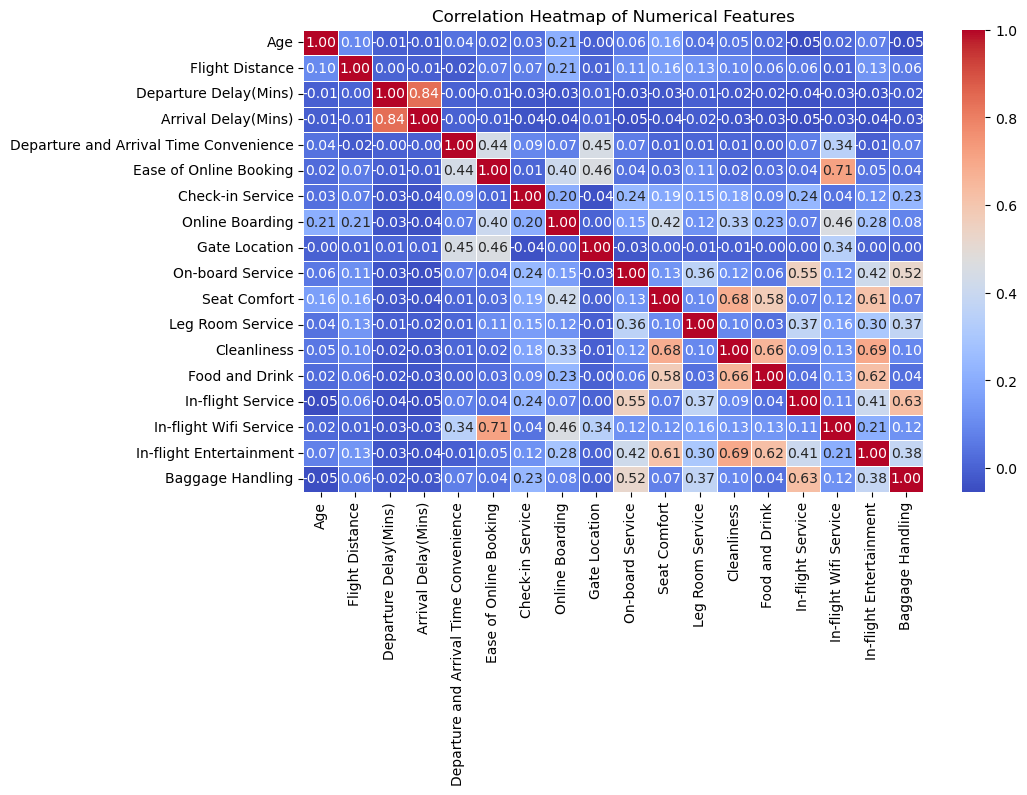

In [99]:
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Insights from Correlation Analysis

1. **Late Departures Lead to Late Arrivals (0.84):**
 If a flight leaves late, it will most likely arrive late as well.
2. **Easy Booking Leads to a Better Schedule Experience (0.44, 0.45):**
Passengers who find booking easy also feel that flight timings are more convenient.
3. **More Legroom Improves Seat Comfort (0.36):**
Travelers who appreciate seat comfort also tend to rate legroom service positively.
4. **Better Food Service is Linked to Cleanliness and Overall Service (Above 0.5):**
Flights that provide good food are often rated as cleaner and having better overall service.
5. **Better Wi-Fi Enhances In-Flight Entertainment Experience (0.61):**
Passengers who enjoy in-flight entertainment also tend to be satisfied with the Wi-Fi service.

# 4. CONCLUSION

- Most passengers are working professionals or frequent travelers.
- Short-haul flights are more common than long-haul flights.
- While most flights are on time, some experience noticeable delays.
- Business travelers and Business Class passengers are more satisfied than Economy Class and new passengers.
- Passenger satisfaction is influenced by punctuality, booking ease, seat comfort, food quality, and Wi-Fi service.

# 5. RECOMMENDATIONS

- Improve flight punctuality by optimizing scheduling and reducing delays.
- Enhance Economy Class experience with better seating, small perks, and improved onboarding.
- Upgrade in-flight services, including Wi-Fi, food quality, and cleanliness.